In [8]:
%matplotlib notebook
import matplotlib.pyplot as pl
from astropy.io import fits
import galsim
import numpy as np

Plot im['MSK'] over starlist stars and see what happes

In [56]:
def load_psf_and_image(path_to_image, name_of_image, path_to_psf, starlist,path_to_cat,name_of_cat):
    image = galsim.fits.read(path_to_image+name_of_image)
    mask = galsim.fits.read(path_to_image+name_of_image,hdu=2)
    starlist = fits.open(path_to_psf+starlist)
    #des_psfex = galsim.des.DES_PSFEx(path_to_psf+psfmodel,path_to_image+name_of_image)
    image_fits = fits.open(path_to_image+name_of_image)
    #wcs_pixel_world = WCS(image_fits[1].header) 
    ccdcoords = findall(r'\d+',image_fits['sci'].header['detsec']) 
    min_x_pix, min_y_pix = int(ccdcoords[0]),int(ccdcoords[2])
    cat = fits.open(path_to_cat+name_of_cat)       
    return image, weight, starlist, min_x_pix, min_y_pix, cat

def match_star_to_cat(starlist,cat,pixeldistance=1):
    good_index = get_psf_stars_index(starlist)
    goodstars = starlist[2].data[good_index]
    #now get the X and Y CCD coordinates of each of the "good" stars
    X,Y = goodstars['x_image'],goodstars['y_image']
    print('will try to match %d stars to the fullcat'%(len(X)))
    Xcat,Ycat = cat[2].data['x_image'],cat[2].data['y_image'] 
    matched_star_indices=np.array([],dtype=int)
    match_fail=0
    for x,y in zip(X,Y):
        #will match stars in starlist by their X,Y position
        wherex,wherey = np.isclose(x,Xcat,atol=pixeldistance),np.isclose(y,Ycat,atol=pixeldistance)
        product = wherex*wherey
        if np.sum(product)!=1: 
            match_fail=match_fail+1
            continue
        else:
            matched_star_indices = np.append(matched_star_indices,np.where(product)[0])
    print('Failed to find a match in the sextractor fullcat for %1.2f percent of the starlist stars'%(100*match_fail/len(good_index)))
    return matched_star_indices


def check_if_star_should_have_been_masked(starlist, cat):
    #get the starlist entry, match it to sextractor catalog imaflags_iso and see if it has a mask
    matched_star_indices = match_star_to_cat(starlist,cat)
    matched_imaflags_iso = cat[2].data['imaflags_iso'][matched_star_indices]
    #print('Flags found for matched stars:',np.unique(matched_imaflags_iso))
    return matched_imaflags_iso

def get_flux_auto_from_cat(starlist,cat):
    matched_star_indices = match_star_to_cat(starlist,cat)
    matched_flux_auto = cat[2].data['flux_auto'][matched_star_indices]
    return matched_flux_auto

def get_psf_stars_index(starlist):
    goodstars= np.where(starlist[2].data['flags_psf']==0)[0]
    #print(goodstars)
    #print('found %d/%d stars with flagss_psf==0'%(len(goodstars),len(starlist[2].data['flags_psf'])))
    return goodstars


In [15]:
ccdlist = []
for n in (np.arange(59)+1):
    if n<10:
        ccdlist.append('c0'+str(n))
    else:
        ccdlist.append('c'+str(n))

In [66]:
rootdir =  '../../../exp720094/'

flagnumbers=np.array([])
for ccd in ccdlist:
    prefix = 'D00720094_g_'+ccd+'_r3755p01_'
    path_to_image = rootdir+'g/'
    path_to_cat = rootdir+'cat_g/'
    path_to_psf = rootdir+'psf_g/'
    name_of_image = prefix+'immasked.fits.fz'
    name_of_starlist = prefix+'psfex-starlist.fits'
    name_of_cat = prefix+'red-fullcat.fits'
    msk = galsim.fits.read(path_to_image+name_of_image,hdu=2)
    starlist = fits.open(path_to_psf+name_of_starlist)
    goodstars = get_psf_stars_index(starlist)
    flagged_y = starlist[2].data['Y_IMAGE'][goodstars]
    flagged_x = starlist[2].data['X_IMAGE'][goodstars]
    cat = fits.open(path_to_cat+name_of_cat)
    print('plotting %d stars'%(len(flagged_x)))
    flagnumbers = np.append(flagnumbers,check_if_star_should_have_been_masked(starlist,cat))
    '''
    pl.figure()
    pl.title('exp 960200 iband CCD '+ccd)
    pl.imshow(np.log10(msk.array.T+1),cmap='tab20c')
    pl.colorbar()

    pl.scatter(flagged_y, flagged_x,color='w',marker='x')
    pl.savefig('/Users/secco/Documents/projects/SHEAR/shearcat/test_figs/iband/'+ccd+'.png')
    pl.close()
    '''

plotting 281 stars
will try to match 281 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.00 percent of the starlist stars
plotting 296 stars
will try to match 296 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.34 percent of the starlist stars
plotting 292 stars
will try to match 292 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.34 percent of the starlist stars
plotting 295 stars
will try to match 295 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.34 percent of the starlist stars
plotting 276 stars
will try to match 276 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.00 percent of the starlist stars
plotting 296 stars
will try to match 296 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.00 percent of the starlist stars
plotting 305 stars
will try to match 305 stars to the fullcat
Failed to find a match in the sextract

Failed to find a match in the sextractor fullcat for 0.29 percent of the starlist stars
plotting 308 stars
will try to match 308 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.32 percent of the starlist stars
plotting 294 stars
will try to match 294 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.34 percent of the starlist stars
plotting 317 stars
will try to match 317 stars to the fullcat
Failed to find a match in the sextractor fullcat for 0.32 percent of the starlist stars


<IPython.core.display.Javascript object>


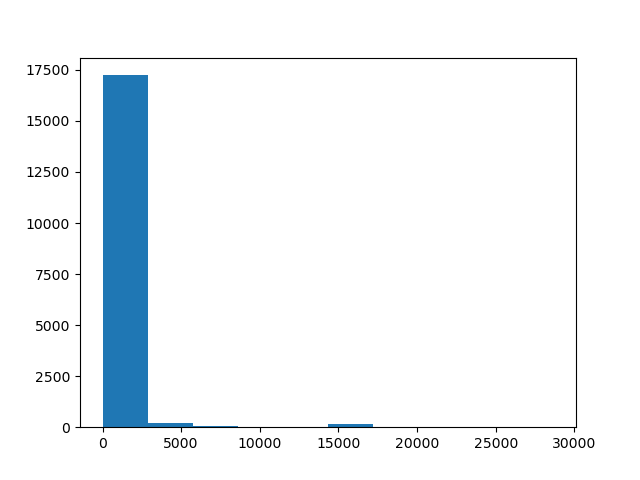

In [67]:
pl.figure()
pl.hist(flagnumbers)
pl.show()

In [68]:
print('In exposure 720094:')
for flagN in np.unique(flagnumbers):
    print('%1.2f%% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=%d'%( 100*np.sum(flagnumbers==flagN)/len(flagnumbers), flagN ))

In exposure 720094:
95.80% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=0
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=5
0.31% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=20
0.43% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=32
0.06% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=256
0.14% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=1024
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=1044
0.32% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=2048
0.46% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=2053
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=2069
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=2117
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=3142
1.17% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=4096
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=4128
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=6144
0.04% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=6149
0.15% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=8192
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=8704
0.01% stars with PSF_FLAGS=0 have IMAFLAGS_ISO=10245
0

In [62]:
len(flagnumbers)

9783

In [20]:
rootdir =  '../../../exp720094/'
ccd='c03'
prefix = 'D00720094_g_'+ccd+'_r3755p01_'
path_to_image = rootdir+'g/'
path_to_cat = rootdir+'cat_g/'
path_to_psf = rootdir+'psf_g/'
name_of_image = prefix+'immasked.fits.fz'
name_of_starlist = prefix+'psfex-starlist.fits'
name_of_cat = prefix+'red-fullcat.fits'
  
galsim.fits.read(path_to_image+name_of_image,hdu=2)


galsim.Image(bounds=galsim.BoundsI(xmin=1, xmax=2048, ymin=1, ymax=4096), array=
array([[25089, 25089, 25089, ..., 25089, 25089, 25089],
       [25089, 27136, 25089, ..., 25089, 27136, 25089],
       [25089, 27136, 25089, ..., 25089, 27136, 25089],
       ...,
       [25089, 25089, 25089, ..., 25089, 25089, 25089],
       [25089, 25089, 25089, ..., 25089, 25089, 25089],
       [25089, 25089, 25089, ..., 25089, 25089, 25089]], dtype=int16), wcs=galsim.GSFitsWCS(_data = ['TPV', array([13421.1022915, -2217.64391694]), array([[1.015849515889e-07, 7.306637814051e-05], [-7.297130410098e-05, -1.063108704478e-07]]), coord.CelestialCoord(coord.Angle(2.314142082741464, coord.radians), coord.Angle(-0.056791068379199575, coord.radians)), array([[[-0.004449421438025, 0.01106179077375, -0.0101543371545, 0.00360669097513], [1.012178411424, -0.01964883354169, 0.00731100842178, 0.0], [-0.008966470761358, 0.00892509986042, 0.0, 0.0], [-0.000156514587489, 0.0, 0.0, 0.0]], [[-0.001259926078282, 1.00681288

In [24]:
starlist = fits.open(path_to_psf+name_of_starlist)

In [26]:
starlist[2].header

XTENSION= 'BINTABLE'           / THIS IS A BINARY TABLE (FROM THE LDACTOOLS)    
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                   78 / BYTES PER ROW                                  
NAXIS2  =                  645 / NUMBER OF ROWS                                 
PCOUNT  =                    0 / RANDOM PARAMETER COUNT                         
GCOUNT  =                    1 / GROUP COUNT                                    
TFIELDS =                   15 / FIELDS PER ROWS                                
EXTNAME = 'LDAC_OBJECTS'       / TABLE NAME                                     
TTYPE1  = 'SOURCE_NUMBER'      / Source index                                   
TFORM1  = '1J      '                                                            
TDISP1  = 'I10     '                                                            
TTYPE2  = 'EXTENSION'       

<IPython.core.display.Javascript object>


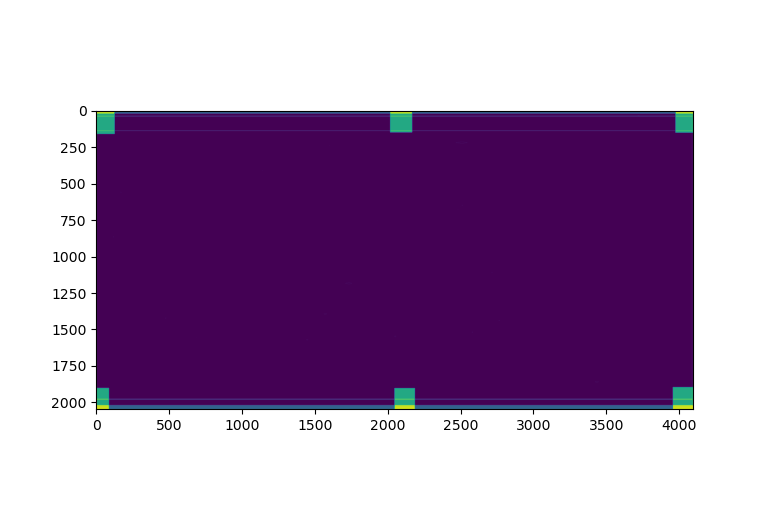

In [23]:
pl.imshow(galsim.fits.read(path_to_image+name_of_image,hdu=2).array.T)
pl.show()